In [8]:
import csv

train_data = []
with open("drive/MyDrive/liar_dataset/train.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
        train_data.append(line)

val_data = []
with open("drive/MyDrive/liar_dataset/valid.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
        val_data.append(line)

In [59]:
subject_dict = {'pants-fire':[], 'false':[], 'barely-true':[], 'half-true':[], 'mostly-true':[], 'true':[]}
people_dict = {'pants-fire':[], 'false':[], 'barely-true':[], 'half-true':[], 'mostly-true':[], 'true':[]}
job_dict = {'pants-fire':[], 'false':[], 'barely-true':[], 'half-true':[], 'mostly-true':[], 'true':[]}
state_dict = {'pants-fire':[], 'false':[], 'barely-true':[], 'half-true':[], 'mostly-true':[], 'true':[]}
party_dict = {'pants-fire':[], 'false':[], 'barely-true':[], 'half-true':[], 'mostly-true':[], 'true':[]}
for meta_data in train_data:
  if meta_data[1] == 'true':
    try:
      subject_dict['true'].extend(meta_data[3].split(','))
      people_dict['true'].append(meta_data[4])
      job_dict['true'].append(meta_data[5])
      state_dict['true'].append(meta_data[6])
      party_dict['true'].append(meta_data[7])
    except:
      pass
  elif meta_data[1] == 'mostly-true':
    try:
      subject_dict['mostly-true'].extend(meta_data[3].split(','))
      people_dict['mostly-true'].append(meta_data[4])
      job_dict['mostly-true'].append(meta_data[5])
      state_dict['mostly-true'].append(meta_data[6])
      party_dict['mostly-true'].append(meta_data[7])
    except:
      pass
  elif meta_data[1] == 'half-true':
    try:
      subject_dict['half-true'].extend(meta_data[3].split(','))
      people_dict['half-true'].append(meta_data[4])
      job_dict['half-true'].append(meta_data[5])
      state_dict['half-true'].append(meta_data[6])
      party_dict['half-true'].append(meta_data[7])
    except:
      pass
  elif meta_data[1] == 'barely-true':
    try:
      subject_dict['barely-true'].extend(meta_data[3].split(','))
      people_dict['barely-true'].append(meta_data[4])
      job_dict['barely-true'].append(meta_data[5])
      state_dict['barely-true'].append(meta_data[6])
      party_dict['barely-true'].append(meta_data[7])
    except:
      pass
  elif meta_data[1] == 'false':
    try:
      subject_dict['false'].extend(meta_data[3].split(','))
      people_dict['false'].append(meta_data[4])
      job_dict['false'].append(meta_data[5])
      state_dict['false'].append(meta_data[6])
      party_dict['false'].append(meta_data[7])
    except:
      pass
  else:
    try:
      subject_dict['pants-fire'].extend(meta_data[3].split(','))
      people_dict['pants-fire'].append(meta_data[4])
      job_dict['pants-fire'].append(meta_data[5])
      state_dict['pants-fire'].append(meta_data[6])
      party_dict['pants-fire'].append(meta_data[7])
    except:
      pass

# Most common subjects

In [113]:
all_subjects = {}
for meta_data in train_data:
  try:
    subjects = meta_data[3].split(',')
    for subject in subjects:
      if subject not in all_subjects:
        all_subjects[subject] = 1
      else:
        all_subjects[subject] += 1
  except:
    pass

In [114]:
sorted(all_subjects.items(), key=lambda item:item[1], reverse=True)[:5]

[('economy', 1162),
 ('health-care', 1128),
 ('taxes', 994),
 ('federal-budget', 744),
 ('education', 728)]

In [115]:
true_subject = Counter(subject_dict['true'])
mostly_true_subject = Counter(subject_dict['mostly-true'])
half_true_subject = Counter(subject_dict['half-true'])
barely_true_subject = Counter(subject_dict['barely-true'])
false_subject = Counter(subject_dict['false'])
pants_fire_subject = Counter(subject_dict['pants-fire'])

In [116]:
most_common_subjects = {'economy':[], 'health-care':[], 'taxes':[], 'federal-budget':[], 'education':[]}
for subject in most_common_subjects.keys():
  most_common_subjects[subject].extend([true_subject[subject], mostly_true_subject[subject], half_true_subject[subject],
                                        barely_true_subject[subject], false_subject[subject], pants_fire_subject[subject]])
# for subject in most_common_subjects.keys():
#   total = sum(most_common_subjects[subject])
#   for j in range(6):
#     most_common_subjects[subject][j] /= total

In [117]:
most_common_subjects

{'economy': [206, 248, 276, 177, 191, 64],
 'education': [116, 174, 176, 117, 111, 34],
 'federal-budget': [116, 136, 183, 125, 148, 36],
 'health-care': [136, 170, 225, 217, 261, 119],
 'taxes': [141, 214, 207, 176, 188, 68]}

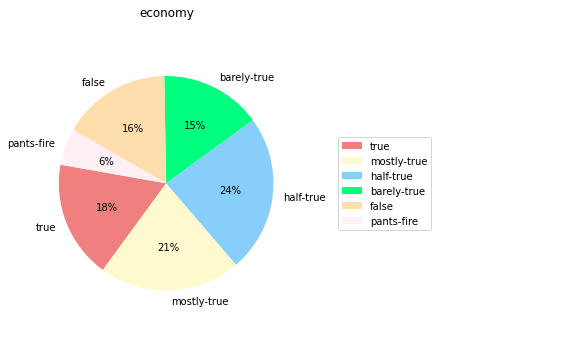

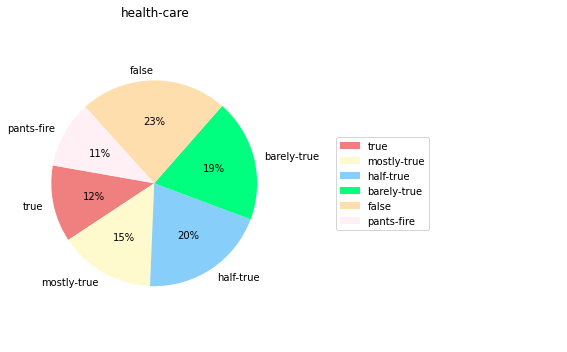

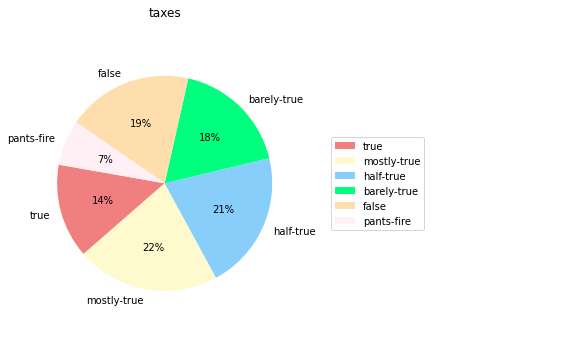

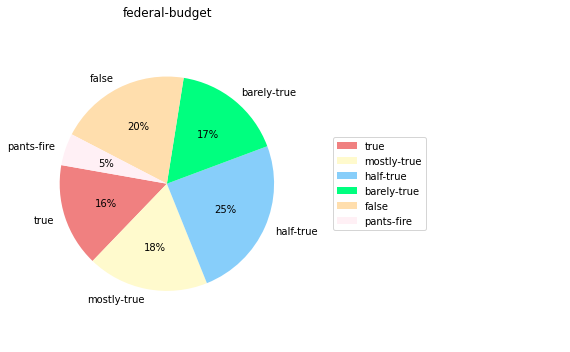

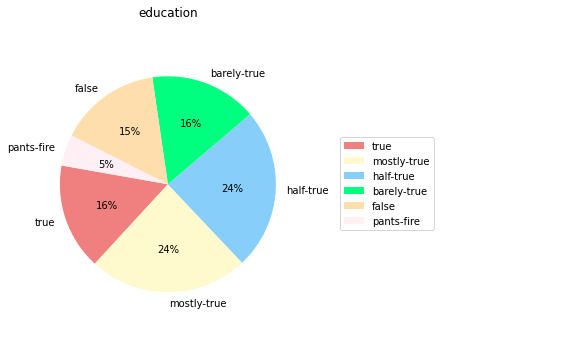

In [184]:
from matplotlib import font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt


labels = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']
colors = ['lightcoral', 'lemonchiffon', 'lightskyblue', 'springgreen', 'navajowhite', 'lavenderblush']

for subject in most_common_subjects:
  x = most_common_subjects[subject]
  fig, axes = plt.subplots(figsize=(8,5),ncols=2)
  ax1, ax2 = axes.ravel()
  patches, texts, autotexts = ax1.pie(x, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=170)
  ax1.axis('equal')
  ax1.set_title(subject, loc='center')
  ax2.axis('off')
  ax2.legend(patches, labels, loc='center left')
  plt.tight_layout()
  plt.savefig(subject + '.jpg')
  plt.show()

# Most common people

In [118]:
all_people = {}
for meta_data in train_data:
  try:
    people = meta_data[4]
    if people not in all_people:
      all_people[people] = 1
    else:
      all_people[people] += 1
  except:
    pass

In [119]:
sorted(all_people.items(), key=lambda item:item[1], reverse=True)[:5]

[('barack-obama', 488),
 ('donald-trump', 273),
 ('hillary-clinton', 239),
 ('mitt-romney', 176),
 ('scott-walker', 149)]

In [120]:
true_people = Counter(people_dict['true'])
mostly_true_people = Counter(people_dict['mostly-true'])
half_true_people = Counter(people_dict['half-true'])
barely_true_people = Counter(people_dict['barely-true'])
false_people = Counter(people_dict['false'])
pants_fire_people = Counter(people_dict['pants-fire'])

In [123]:
most_common_people = {'barack-obama':[], 'donald-trump':[], 'hillary-clinton':[], 'mitt-romney':[], 'scott-walker':[]}
for people in most_common_people.keys():
  most_common_people[people].extend([true_people[people], mostly_true_people[people], half_true_people[people],
                                        barely_true_people[people], false_people[people], pants_fire_people[people]])
# for people in most_common_people.keys():
#   total = sum(most_common_people[people])
#   for j in range(6):
#     most_common_people[people][j] /= total

In [124]:
most_common_people

{'barack-obama': [103, 130, 124, 56, 67, 8],
 'donald-trump': [6, 27, 39, 48, 101, 52],
 'hillary-clinton': [60, 65, 51, 30, 27, 6],
 'mitt-romney': [30, 27, 47, 27, 28, 17],
 'scott-walker': [21, 34, 29, 22, 35, 8]}

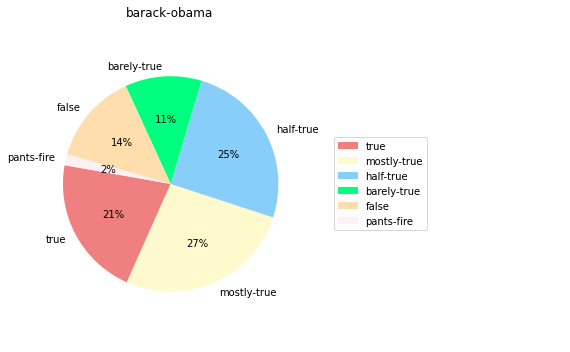

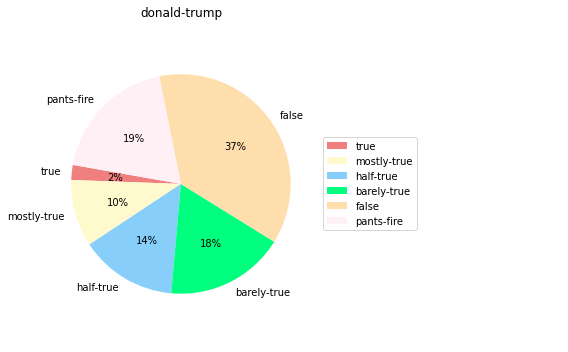

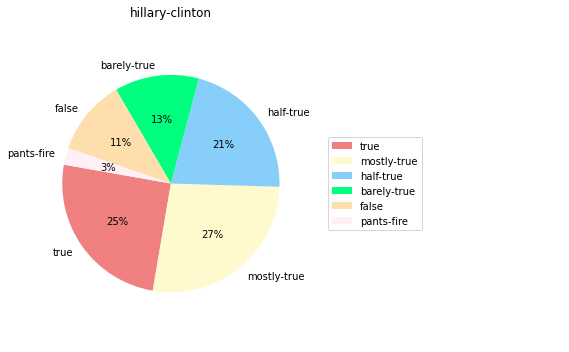

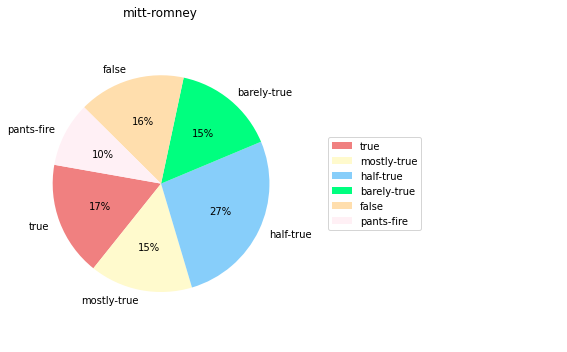

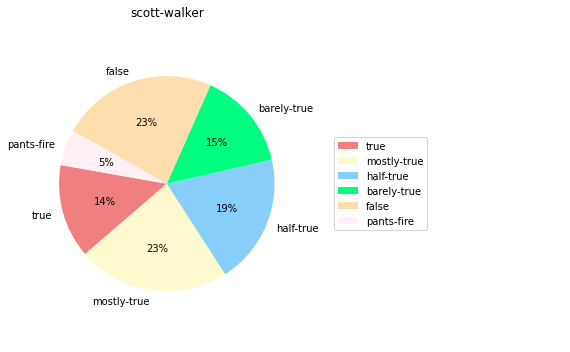

In [185]:
for people in most_common_people:
  x = most_common_people[people]
  fig, axes = plt.subplots(figsize=(8,5),ncols=2)
  ax1, ax2 = axes.ravel()
  patches, texts, autotexts = ax1.pie(x, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=170)
  ax1.axis('equal')
  ax1.set_title(people, loc='center')
  ax2.axis('off')
  ax2.legend(patches, labels, loc='center left')
  plt.tight_layout()
  plt.savefig(people + '.jpg')
  plt.show()

# Most common jobs

In [125]:
all_jobs = {}
for meta_data in train_data:
  try:
    job = meta_data[5]
    if job == '':
      continue
    if job not in all_jobs:
      all_jobs[job] = 1
    else:
      all_jobs[job] += 1
  except:
    pass

In [126]:
all_jobs['U.S. Senator'] = 479 + 263
all_jobs['U.S. senator'] = 0
sorted(all_jobs.items(), key=lambda item:item[1], reverse=True)[:5]

[('U.S. Senator', 742),
 ('President', 492),
 ('Governor', 391),
 ('President-Elect', 273),
 ('Presidential candidate', 254)]

In [127]:
true_jobs = Counter(job_dict['true'])
mostly_true_jobs = Counter(job_dict['mostly-true'])
half_true_jobs = Counter(job_dict['half-true'])
barely_true_jobs = Counter(job_dict['barely-true'])
false_jobs = Counter(job_dict['false'])
pants_fire_jobs = Counter(job_dict['pants-fire'])

In [140]:
most_common_jobs = {'U.S. Senator':[], 'President':[], 'Governor':[], 'President-Elect':[], 'Presidential candidate':[]}
for jobs in most_common_jobs.keys():
  if jobs == 'U.S. Senator':
    most_common_jobs[jobs].extend([true_jobs[jobs] + true_jobs['U.S. senator'], mostly_true_jobs[jobs] + mostly_true_jobs['U.S. senator'], 
                                   half_true_jobs[jobs] + half_true_jobs['U.S. senator'], barely_true_jobs[jobs] + barely_true_jobs['U.S. senator'],
                                   false_jobs[jobs] + false_jobs['U.S. senator'], pants_fire_jobs[jobs] + pants_fire_jobs['U.S. senator']])
  else:
    most_common_jobs[jobs].extend([true_jobs[jobs], mostly_true_jobs[jobs], half_true_jobs[jobs],
                                        barely_true_jobs[jobs], false_jobs[jobs], pants_fire_jobs[jobs]])
# for jobs in most_common_jobs.keys():
#   total = sum(most_common_jobs[jobs])
#   for j in range(6):
#     most_common_jobs[jobs][j] /= total

In [141]:
most_common_jobs

{'Governor': [59, 65, 93, 65, 75, 34],
 'President': [104, 131, 125, 56, 68, 8],
 'President-Elect': [6, 27, 39, 48, 101, 52],
 'Presidential candidate': [60, 70, 56, 33, 29, 6],
 'U.S. Senator': [160, 180, 160, 110, 117, 15]}

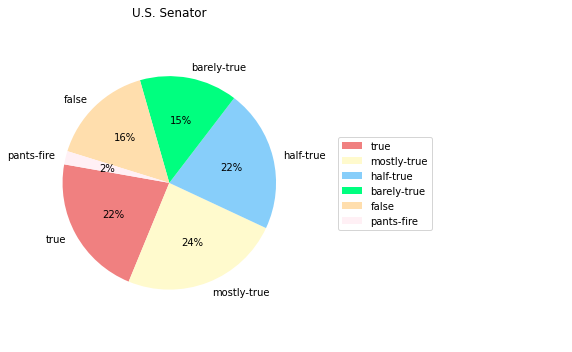

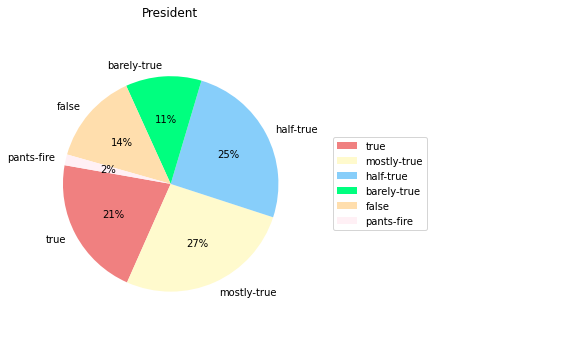

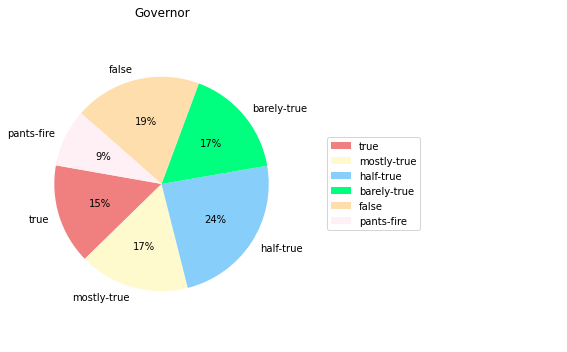

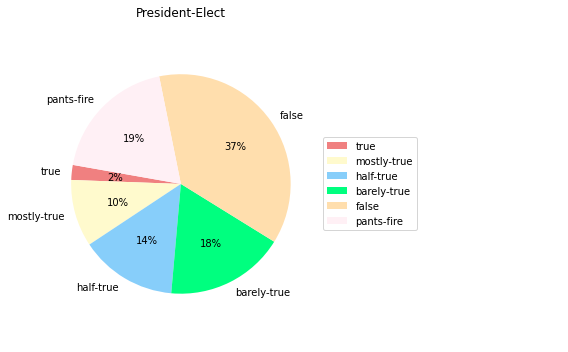

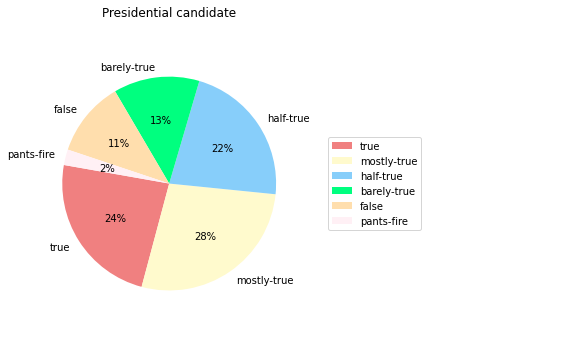

In [186]:
for job in most_common_jobs:
  x = most_common_jobs[job]
  fig, axes = plt.subplots(figsize=(8,5),ncols=2)
  ax1, ax2 = axes.ravel()
  patches, texts, autotexts = ax1.pie(x, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=170)
  ax1.axis('equal')
  ax1.set_title(job, loc='center')
  ax2.axis('off')
  ax2.legend(patches, labels, loc='center left')
  plt.tight_layout()
  plt.savefig(job + '.jpg')
  plt.show()

# Most common state

In [130]:
all_states = {}
for meta_data in train_data:
  try:
    state = meta_data[6]
    if state == '':
      continue
    if state not in all_states:
      all_states[state] = 1
    else:
      all_states[state] += 1
  except:
    pass

In [131]:
sorted(all_states.items(), key=lambda item:item[1], reverse=True)[:5]

[('Texas', 1009),
 ('Florida', 997),
 ('Wisconsin', 713),
 ('New York', 657),
 ('Illinois', 556)]

In [132]:
true_states = Counter(state_dict['true'])
mostly_true_states = Counter(state_dict['mostly-true'])
half_true_states = Counter(state_dict['half-true'])
barely_true_states = Counter(state_dict['barely-true'])
false_states = Counter(state_dict['false'])
pants_fire_states = Counter(state_dict['pants-fire'])

In [133]:
most_common_states = {'Texas':[], 'Florida':[], 'Wisconsin':[], 'New York':[], 'Illinois':[]}
for states in most_common_states.keys():
  most_common_states[states].extend([true_states[states], mostly_true_states[states], half_true_states[states],
                                        barely_true_states[states], false_states[states], pants_fire_states[states]])
# for states in most_common_states.keys():
#   total = sum(most_common_states[states])
#   for j in range(6):
#     most_common_states[states][j] /= total

In [134]:
most_common_states

{'Florida': [156, 217, 224, 188, 167, 45],
 'Illinois': [111, 149, 137, 65, 83, 11],
 'New York': [88, 118, 121, 98, 166, 66],
 'Texas': [162, 182, 198, 192, 188, 87],
 'Wisconsin': [83, 133, 147, 122, 171, 57]}

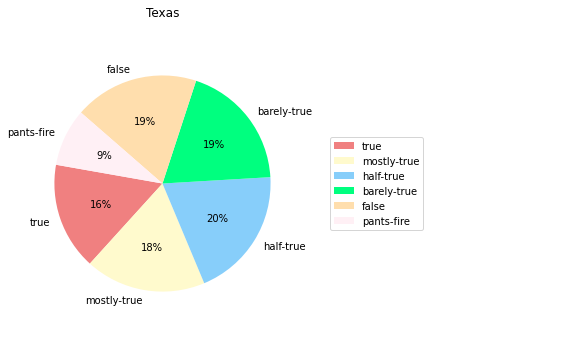

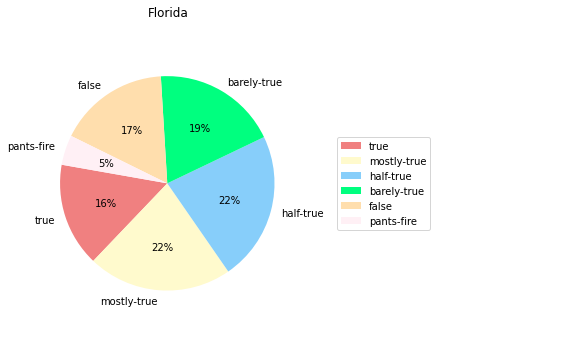

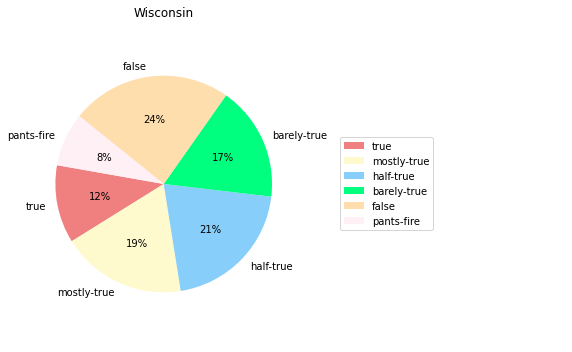

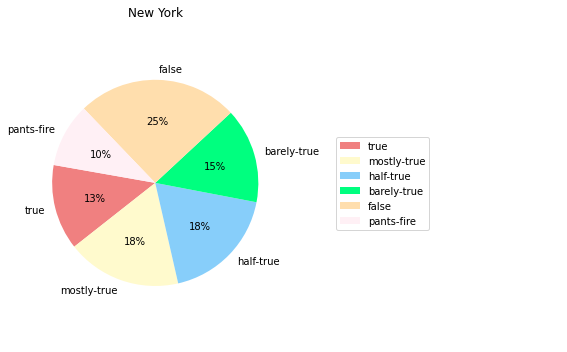

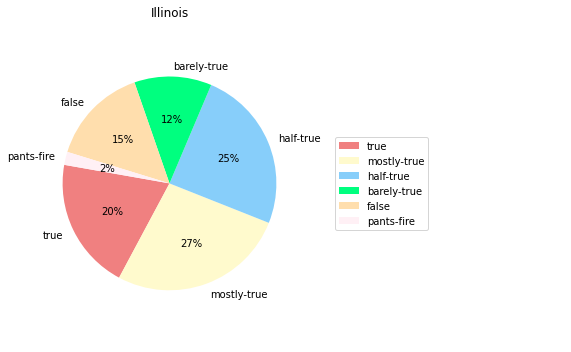

In [187]:
for state in most_common_states:
  x = most_common_states[state]
  fig, axes = plt.subplots(figsize=(8,5),ncols=2)
  ax1, ax2 = axes.ravel()
  patches, texts, autotexts = ax1.pie(x, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=170)
  ax1.axis('equal')
  ax1.set_title(state, loc='center')
  ax2.axis('off')
  ax2.legend(patches, labels, loc='center left')
  plt.tight_layout()
  plt.savefig(state + '.jpg')
  plt.show()

# Most common party

In [135]:
all_party = {}
for meta_data in train_data:
  try:
    party = meta_data[7]
    if party == '' or party == 'none':
      continue
    if party not in all_party:
      all_party[party] = 1
    else:
      all_party[party] += 1
  except:
    pass

In [136]:
sorted(all_party.items(), key=lambda item:item[1], reverse=True)[:5]

[('republican', 4497),
 ('democrat', 3336),
 ('organization', 219),
 ('independent', 147),
 ('newsmaker', 56)]

In [137]:
true_party = Counter(party_dict['true'])
mostly_true_party = Counter(party_dict['mostly-true'])
half_true_party = Counter(party_dict['half-true'])
barely_true_party = Counter(party_dict['barely-true'])
false_party = Counter(party_dict['false'])
pants_fire_party = Counter(party_dict['pants-fire'])

In [138]:
most_common_party = {'republican':[], 'democrat':[], 'organization':[], 'independent':[], 'newsmaker':[]}
for party in most_common_party.keys():
  most_common_party[party].extend([true_party[party], mostly_true_party[party], half_true_party[party],
                                        barely_true_party[party], false_party[party], pants_fire_party[party]])
# for party in most_common_party.keys():
#   total = sum(most_common_party[party])
#   for j in range(6):
#     most_common_party[party][j] /= total

In [139]:
most_common_party

{'democrat': [658, 801, 750, 463, 511, 153],
 'independent': [29, 51, 27, 19, 18, 3],
 'newsmaker': [15, 11, 11, 7, 9, 3],
 'organization': [24, 24, 59, 45, 50, 17],
 'republican': [660, 707, 890, 832, 1028, 380]}

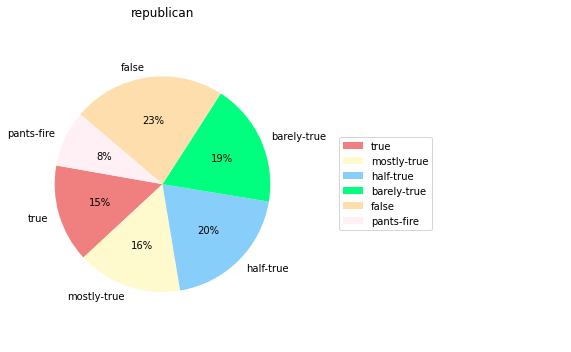

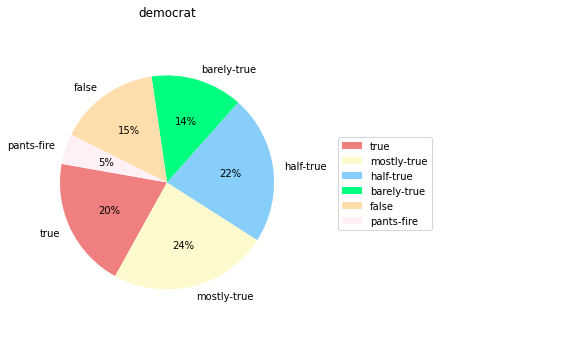

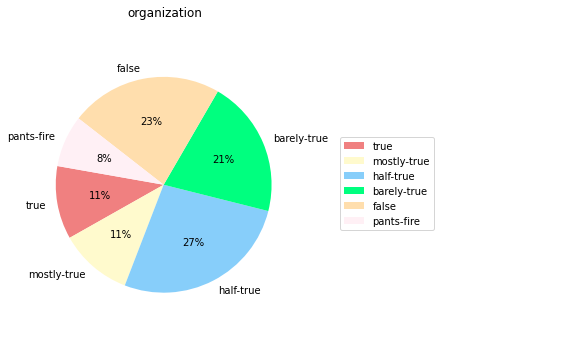

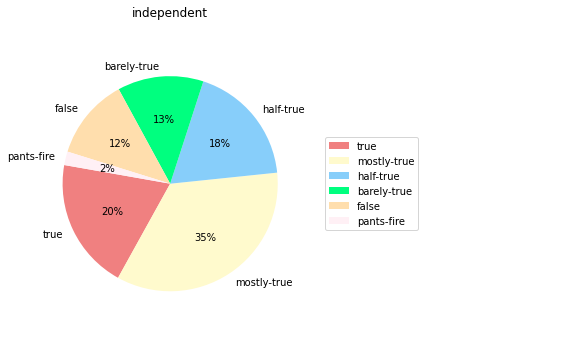

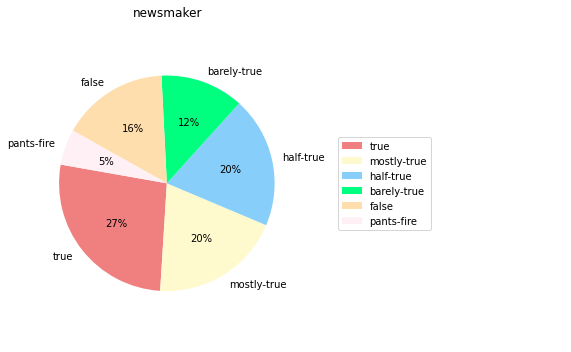

In [188]:
for party in most_common_party:
  x = most_common_party[party]
  fig, axes = plt.subplots(figsize=(8,5),ncols=2)
  ax1, ax2 = axes.ravel()
  patches, texts, autotexts = ax1.pie(x, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=170)
  ax1.axis('equal')
  ax1.set_title(party, loc='center')
  ax2.axis('off')
  ax2.legend(patches, labels, loc='center left')
  plt.tight_layout()
  plt.savefig(party + '.jpg')
  plt.show()